# 0. Basic Setup and Exploration

In [31]:
# Basic packages
import copy
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# import sklearn packages
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
#from sklearn.neural_network import MLPRegressor
from math import sqrt

# import visualization libraries
from IPython.display import Image  
import pydotplus
from sklearn.externals.six import StringIO

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# TO ignore future warnings from sklearn and seaborn
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

# make the output stable across runs
np.random.seed(42)

In [2]:
# read the data
# wine_raw = pd.read_csv('wine.csv')
wine_raw = pd.read_csv('wine_6497.csv')

In [3]:
# glimpse the data
print("Shape of Wine data:\nrows:", wine_raw.shape[0], '\ncolumns:', wine_raw.shape[1])

Shape of Wine data:
rows: 6497 
columns: 13


In [155]:
wine_raw.head()

type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
wine_raw.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                ph    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
# check missing data (There is no missing data in the red wine dataset, but do have some NA in the whole dataset.)
total = wine_raw.isnull().sum().sort_values(ascending = False)
percent = (wine_raw.isnull().sum()/wine_raw.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

fixed_acidity        ph  volatile_acidity  sulphates  citric_acid  \
Total        10.000000  9.000000          8.000000   4.000000     3.000000   
Percent       0.153917  0.138525          0.123134   0.061567     0.046175   

         chlorides  residual_sugar  quality  alcohol  density  \
Total     2.000000        2.000000      0.0      0.0      0.0   
Percent   0.030783        0.030783      0.0      0.0      0.0   

         total_sulfur_dioxide  free_sulfur_dioxide  type  
Total                     0.0                  0.0   0.0  
Percent                   0.0                  0.0   0.0

In [7]:
# drop missing values
wine_clean = copy.deepcopy(wine_raw.dropna())
wine_clean.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992330   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.997000   
max       0.611000           289.000000            440.000000     1.038980   

                ph    sulphates      alcohol      quality  
count  6463.000000  6463.000000  6463.000000  6463.000000  
mean      3.218332     0.531150    10.492825     5.818505  
std       0.160650     0.148913     1.193128     0.873286  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [8]:
# check missing data (double check for wine_clean)
total_cl = wine_clean.isnull().sum().sort_values(ascending = False)
percent_cl = (wine_clean.isnull().sum()/wine_clean.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_cl, percent_cl], axis=1, keys=['Total', 'Percent']).transpose()

quality  alcohol  sulphates   ph  density  total_sulfur_dioxide  \
Total        0.0      0.0        0.0  0.0      0.0                   0.0   
Percent      0.0      0.0        0.0  0.0      0.0                   0.0   

         free_sulfur_dioxide  chlorides  residual_sugar  citric_acid  \
Total                    0.0        0.0             0.0          0.0   
Percent                  0.0        0.0             0.0          0.0   

         volatile_acidity  fixed_acidity  type  
Total                 0.0            0.0   0.0  
Percent               0.0            0.0   0.0

In [9]:
# check data unbalance (The data has not a large unbalance with respect of the target value.)
# explore the target variable: quality
qualitydata = wine_clean.quality.value_counts().sort_index()
qualitydata_df = pd.DataFrame({'Quality': qualitydata.index,'Count': qualitydata.values})
print(qualitydata_df.to_string(index=False))

Quality  Count
      3     30
      4    214
      5   2128
      6   2820
      7   1074
      8    192
      9      5


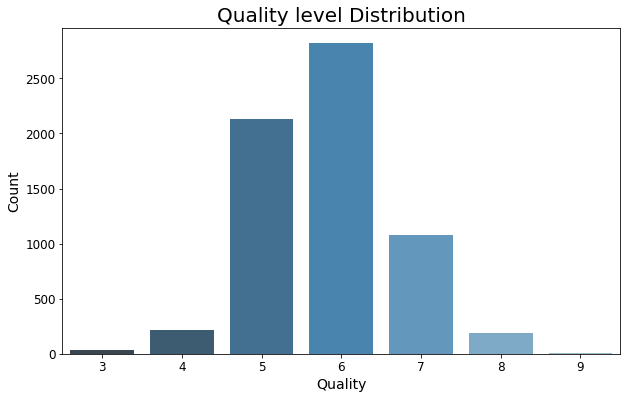

In [10]:
# visualize target variable
plt.figure(figsize=(10,6))
sns.barplot(x = 'Quality', y ="Count", data = qualitydata_df,palette="Blues_d")
plt.title('Quality level Distribution',fontsize=20)
plt.show()

In [11]:
# get feature list and target
features = ['fixed_acidity',
            'volatile_acidity',
            'citric_acid',
                'residual_sugar',
            'chlorides',
                'free_sulfur_dioxide',
            'total_sulfur_dioxide',
            'density',
                'ph',
            'sulphates',
            'alcohol']
target = ['quality']

# form numberic column dataframe
X = wine_clean[features]
y = wine_clean[target]

In [12]:
# # boxplot to see outliers for rescaled features
# plt.figure(figsize = (20,8))
# X_boxplot = X_scale.boxplot(column=features,rot=45)
# plt.show() 

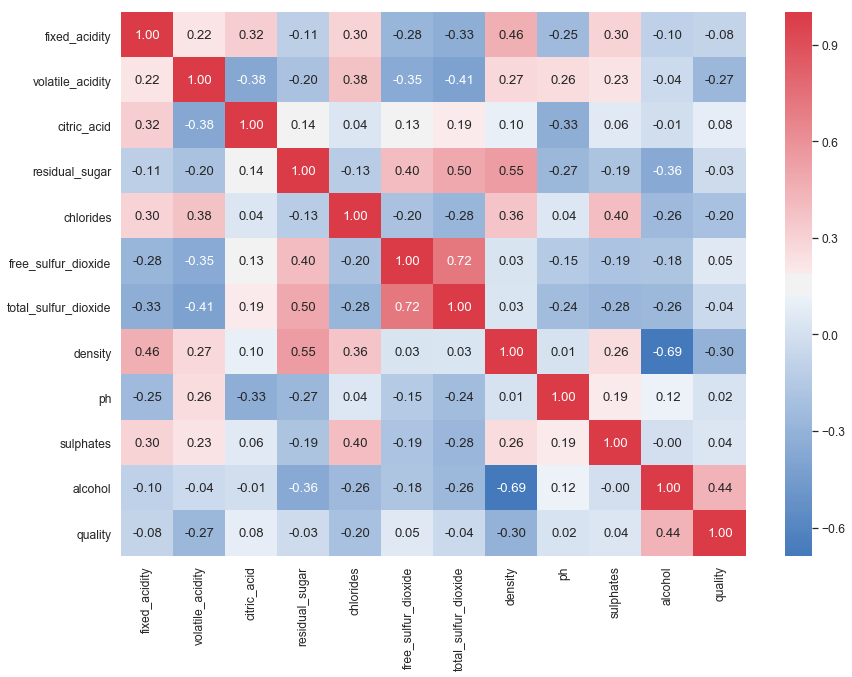

In [230]:
# Correlation Matrix
plt.figure(figsize=(14,10))
corr= wine_clean.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(250, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.9)
plt.show()

In [14]:
# drop column: free_sulfur_dioxide
X_10 = X.drop(columns='free_sulfur_dioxide')
X_10.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  total_sulfur_dioxide      density           ph  \
count  6463.000000           6463.000000  6463.000000  6463.000000   
mean      0.056056            115.694492     0.994698     3.218332   
std       0.035076             56.526736     0.003001     0.160650   
min       0.009000              6.000000     0.987110     2.720000   
25%       0.038000             77.000000     0.992330     3.110000   
50%       0.047000            118.000000     0.994890     3.210000   
75%       0.065000            156.000000     0.997000     3.320000   
max       0.611000            440.000000     1.038980     4.010000   

         sulphates      alcohol  
count  6463.000000  6463.000000  
mean      0.531150    10.492825  
std       0.148913     1.193128  
min       0.220000     8.000000  
25%       0.430000     9.500000  
50%       0.510000    10.300000  
75%       0.600000    11.300000  
max       2.000000    14.900000

In [15]:
features10 = ['fixed_acidity',
            'volatile_acidity',
            'citric_acid',
                'residual_sugar',
            'chlorides',
            'total_sulfur_dioxide',
            'density',
                'ph',
            'sulphates',
            'alcohol']

## 0.1 Feature Scaling

In [16]:
# import for feature scaling
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
# use StandardScaler for SVM: transform features into 0 mean, 1 standard deviation
sts = StandardScaler()

# only get numeric columns, standardise
X_sts = sts.fit_transform(X_10)
X_std = pd.DataFrame(data=X_sts,columns=features10)
X_std.describe()

fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   6.463000e+03      6.463000e+03  6.463000e+03    6.463000e+03   
mean    7.496539e-17     -5.499667e-16  5.397130e-15   -5.625840e-16   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.633473e+00     -1.576837e+00 -2.194680e+00   -1.018391e+00   
25%    -6.301024e-01     -6.656838e-01 -4.734030e-01   -7.661033e-01   
50%    -1.677861e-01     -3.012225e-01 -6.029661e-02   -5.138161e-01   
75%     3.715830e-01      3.669567e-01  4.905119e-01    5.584045e-01   
max     6.689906e+00      7.534697e+00  9.234597e+00    1.268921e+01   

          chlorides  total_sulfur_dioxide       density            ph  \
count  6.463000e+03          6.463000e+03  6.463000e+03  6.463000e+03   
mean  -9.417914e-17          4.233037e-16  5.212812e-14  1.552869e-15   
std    1.000077e+00          1.000077e+00  1.000077e+00  1.000077e+00   
min   -1.341655e+00         -1.940727e+00 -2.528205e+00 -3.102215e+00   
25%   -5.148107e-01         -6.845873e-01 -7.889073e-01 -6.743884e-01   
50%   -2.582038e-01          4.078931e-02  6.408161e-02 -5.186862e-02   
75%    2.550099e-01          7.130896e-01  7.671311e-01  6.329031e-01   
max    1.582249e+01          5.737650e+00  1.475482e+01  4.928289e+00   

          sulphates       alcohol  
count  6.463000e+03  6.463000e+03  
mean   5.248093e-16 -3.829866e-17  
std    1.000077e+00  1.000077e+00  
min   -2.089628e+00 -2.089480e+00  
25%   -6.793038e-01 -8.321839e-01  
50%   -1.420373e-01 -1.616257e-01  
75%    4.623876e-01  6.765720e-01  
max    9.864552e+00  3.694084e+00

In [17]:
X_std.describe()

fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   6.463000e+03      6.463000e+03  6.463000e+03    6.463000e+03   
mean    7.496539e-17     -5.499667e-16  5.397130e-15   -5.625840e-16   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.633473e+00     -1.576837e+00 -2.194680e+00   -1.018391e+00   
25%    -6.301024e-01     -6.656838e-01 -4.734030e-01   -7.661033e-01   
50%    -1.677861e-01     -3.012225e-01 -6.029661e-02   -5.138161e-01   
75%     3.715830e-01      3.669567e-01  4.905119e-01    5.584045e-01   
max     6.689906e+00      7.534697e+00  9.234597e+00    1.268921e+01   

          chlorides  total_sulfur_dioxide       density            ph  \
count  6.463000e+03          6.463000e+03  6.463000e+03  6.463000e+03   
mean  -9.417914e-17          4.233037e-16  5.212812e-14  1.552869e-15   
std    1.000077e+00          1.000077e+00  1.000077e+00  1.000077e+00   
min   -1.341655e+00         -1.940727e+00 -2.528205e+00 -3.102215e+00   
25%   -5.148107e-01         -6.845873e-01 -7.889073e-01 -6.743884e-01   
50%   -2.582038e-01          4.078931e-02  6.408161e-02 -5.186862e-02   
75%    2.550099e-01          7.130896e-01  7.671311e-01  6.329031e-01   
max    1.582249e+01          5.737650e+00  1.475482e+01  4.928289e+00   

          sulphates       alcohol  
count  6.463000e+03  6.463000e+03  
mean   5.248093e-16 -3.829866e-17  
std    1.000077e+00  1.000077e+00  
min   -2.089628e+00 -2.089480e+00  
25%   -6.793038e-01 -8.321839e-01  
50%   -1.420373e-01 -1.616257e-01  
75%    4.623876e-01  6.765720e-01  
max    9.864552e+00  3.694084e+00

In [18]:
# combine X_standard and y to wine_standard
wine_standard = pd.concat([X_std, y], axis=1, sort=False)
wine_standard.describe()

fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   6.463000e+03      6.463000e+03  6.463000e+03    6.463000e+03   
mean    7.496539e-17     -5.499667e-16  5.397130e-15   -5.625840e-16   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.633473e+00     -1.576837e+00 -2.194680e+00   -1.018391e+00   
25%    -6.301024e-01     -6.656838e-01 -4.734030e-01   -7.661033e-01   
50%    -1.677861e-01     -3.012225e-01 -6.029661e-02   -5.138161e-01   
75%     3.715830e-01      3.669567e-01  4.905119e-01    5.584045e-01   
max     6.689906e+00      7.534697e+00  9.234597e+00    1.268921e+01   

          chlorides  total_sulfur_dioxide       density            ph  \
count  6.463000e+03          6.463000e+03  6.463000e+03  6.463000e+03   
mean  -9.417914e-17          4.233037e-16  5.212812e-14  1.552869e-15   
std    1.000077e+00          1.000077e+00  1.000077e+00  1.000077e+00   
min   -1.341655e+00         -1.940727e+00 -2.528205e+00 -3.102215e+00   
25%   -5.148107e-01         -6.845873e-01 -7.889073e-01 -6.743884e-01   
50%   -2.582038e-01          4.078931e-02  6.408161e-02 -5.186862e-02   
75%    2.550099e-01          7.130896e-01  7.671311e-01  6.329031e-01   
max    1.582249e+01          5.737650e+00  1.475482e+01  4.928289e+00   

          sulphates       alcohol      quality  
count  6.463000e+03  6.463000e+03  6463.000000  
mean   5.248093e-16 -3.829866e-17     5.818505  
std    1.000077e+00  1.000077e+00     0.873286  
min   -2.089628e+00 -2.089480e+00     3.000000  
25%   -6.793038e-01 -8.321839e-01     5.000000  
50%   -1.420373e-01 -1.616257e-01     6.000000  
75%    4.623876e-01  6.765720e-01     6.000000  
max    9.864552e+00  3.694084e+00     9.000000

In [19]:
wine_std = wine_standard.dropna().describe()

# 1. Decision Tree Classification

## 1.1 Multi-class Classification

In [221]:
# Since we don't need to rescale the features for decision tree classifier, we use the original X
# Visualize the combined table (which should looks the same as the original dataset)
wine_10 = pd.concat([X_10, y], axis=1, sort=False)
wine_10.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   total_sulfur_dioxide  density    ph  sulphates  alcohol  quality  
0                 170.0   1.0010  3.00       0.45      8.8        6  
1                 132.0   0.9940  3.30       0.49      9.5        6  
2                  97.0   0.9951  3.26       0.44     10.1        6  
3                 186.0   0.9956  3.19       0.40      9.9        6  
4                 186.0   0.9956  3.19       0.40      9.9        6

In [75]:
wine_10.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  total_sulfur_dioxide      density           ph  \
count  6463.000000           6463.000000  6463.000000  6463.000000   
mean      0.056056            115.694492     0.994698     3.218332   
std       0.035076             56.526736     0.003001     0.160650   
min       0.009000              6.000000     0.987110     2.720000   
25%       0.038000             77.000000     0.992330     3.110000   
50%       0.047000            118.000000     0.994890     3.210000   
75%       0.065000            156.000000     0.997000     3.320000   
max       0.611000            440.000000     1.038980     4.010000   

         sulphates      alcohol      quality  
count  6463.000000  6463.000000  6463.000000  
mean      0.531150    10.492825     5.818505  
std       0.148913     1.193128     0.873286  
min       0.220000     8.000000     3.000000  
25%       0.430000     9.500000     5.000000  
50%       0.510000    10.300000     6.000000  
75%       0.600000    11.300000     6.000000  
max       2.000000    14.900000     9.000000

In [76]:
# Split dataset into training set & test set
X_train, X_test, y_train, y_test = train_test_split(X_10, y, test_size=0.2, random_state=200)

In [158]:
from sklearn.tree import DecisionTreeClassifier

# Fit on train set
# clf = DecisionTreeClassifier(max_features=5, max_depth=9, random_state=42) # Grid Search accuracy: 0.625
clf = DecisionTreeClassifier(random_state = 42,
                             max_depth=7, 
                             max_features=10, 
                             max_leaf_nodes=20,
                             min_samples_leaf=3,
                             min_samples_split=7
                            ) # accuracy

clf.fit(X_train, y_train)

0.01730203628540039

In [78]:
# Test the accuracy
prediction = clf.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, prediction))

Decision Tree Accuracy: 0.5413766434648105


In [164]:
# cross validation Score
time1 = time.time()
cv_clf = clf
cv_X = X_10
cv_y = y
cv_folds = 10
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf,cv_X,cv_y,cv=cv_folds,scoring=cv_scoring)
time2 = time.time()
time_used = time2 - time1

print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))
print("10cv time: %.5f" %time_used)

[0.46533128 0.50847458 0.49845679 0.52006173 0.51547988 0.53333333
 0.53643411 0.58604651 0.49689441 0.54347826]
Mean: 0.52040, Std: 0.03082
10cv time: 0.17290


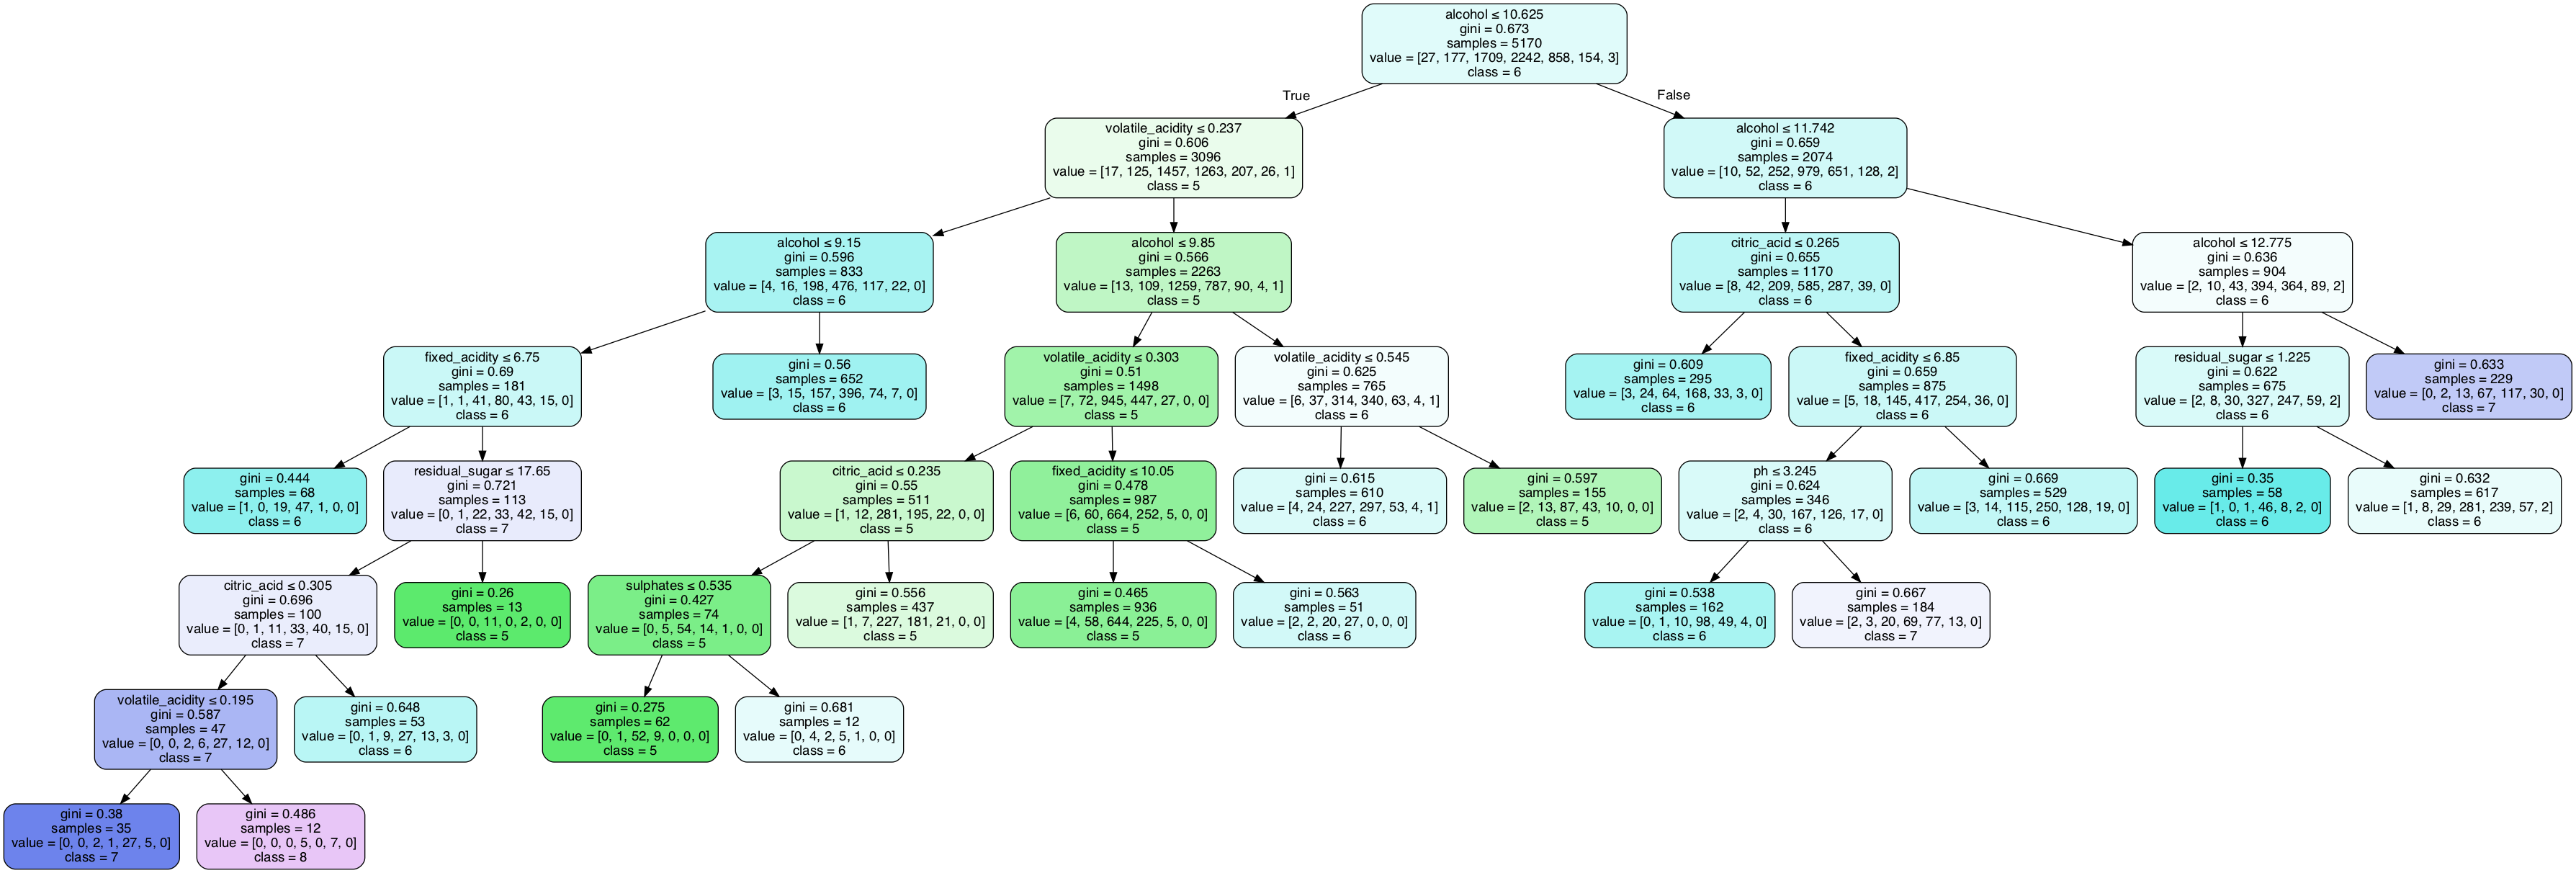

In [80]:
# Decision Tree Visualization - Multi-class
feature_names = np.array(features10)
target_names = ['3','4','5','6','7','8','9']

dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=feature_names,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("wine_dt_1.png")
Image(graph.create_png()) 

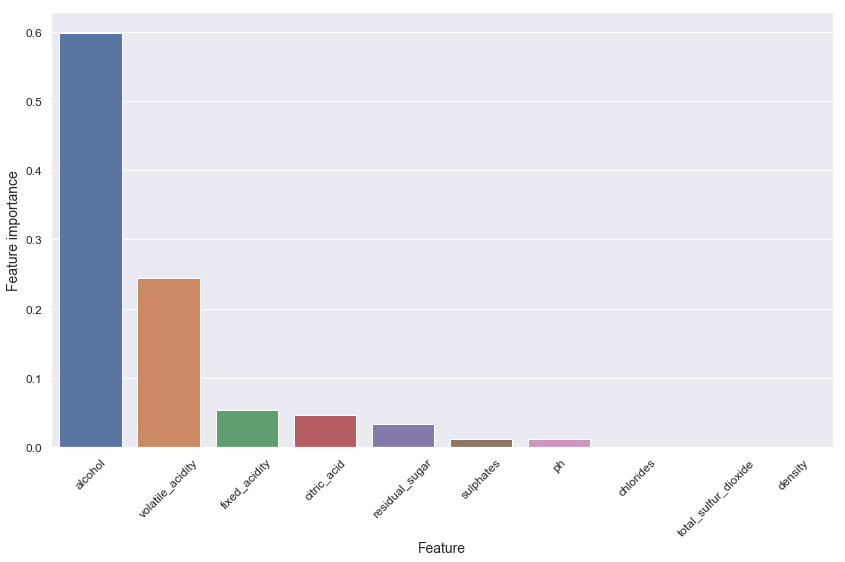

In [84]:
# Feature Importance Evaluation
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.
tmp = pd.DataFrame({'Feature': features10, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (14,8))
# plt.title('Features importance (Multi-class Decision Tree)',fontsize=20)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show() 


Confusion matrix:
 [[  0   0   2   1   0   0   0]
 [  0   0  16  19   2   0   0]
 [  0   0 231 172  13   3   0]
 [  0   0 123 415  39   1   0]
 [  0   0   8 154  54   0   0]
 [  0   0   1  23  14   0   0]
 [  0   0   0   1   1   0   0]]


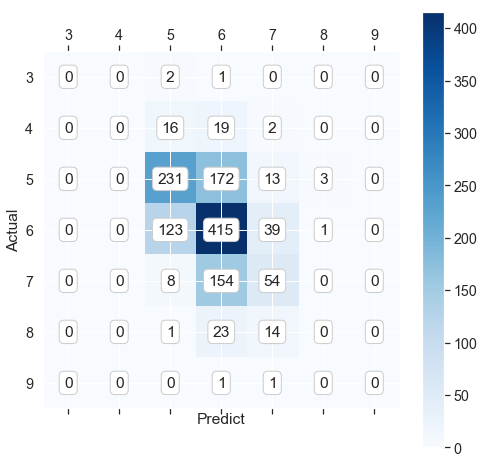

In [28]:
# print("Decision Tree Accuracy:",accuracy_score(y_test, clf.predict(X_test)))

conf_mat = confusion_matrix(y_test, clf.predict(X_test))
# plot_confusion_matrix(conf_mat, classes=class_names, title='Confusion matrix')
print('Confusion matrix:\n', conf_mat)

labels = [3,4,5,6,7,8,9]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='.8'))
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predict')
# plt.title('Multi-class Decision Tree',fontsize=16)
plt.ylabel('Actual')
plt.show()

In [187]:
# Grid Search for Decision Tree Multi-classification
start = time.time()
classifier = DecisionTreeClassifier(random_state = 42)
parameters = {
              'max_depth': range(3,10),
              'max_features': range(3,10),
              'max_leaf_nodes':[5,10,20,100,200]
             }
scoring_fnc = make_scorer(accuracy_score)
kfold = KFold(n_splits=10)
grid = GridSearchCV(classifier, parameters, scoring_fnc, cv=kfold)
grid = grid.fit(X_train, y_train)

clf = grid.best_estimator_

end = time.time()
time_used = end - start
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, clf.get_params()[key]))

print('test score: %f'%clf.score(X_test, y_test))
print('time used: %f'%time_used)

# pd.DataFrame(grid.cv_results_).T

best score: 0.555513
best parameters:
max_depth: 8
max_features: 7
max_leaf_nodes: 200
test score: 0.554524
time used: 25.428246


In [34]:
# RandomizedSearchCV
start = time.time()
classifier = DecisionTreeClassifier(random_state = 42)
parameters = {
              'max_depth': range(3,10),
              'max_features': range(3,10),
              'max_leaf_nodes':[5,10,20,100,200],
             }

rgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = None,n_iter=300,n_jobs = -1)
rgrid.fit(X_train, y_train)

rclf = rgrid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%rgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, rclf.get_params()[key]))

print('test score: %f'%rclf.score(X_test, y_test))
print('time used: %f'%time_used)

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.555126
best parameters:
max_depth: 9
max_features: 4
max_leaf_nodes: 200
test score: 0.565352
time used: 12.802716


## 1.2 Binary Classification

In [64]:
# Convert to a Binary Classification Task
# From the confusion matrix above, we can see a clear boundary between level 5 & 6
# Create a new column called Quality Label. This column will contain the values of 0 & 1
# where 1 = good, 0 = bad
wine2 = copy.deepcopy(wine_clean)
wine2['quality_label'] = (wine2['quality'] > 5.5)*1
wine2.head()

type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  quality_label  
0       0.45      8.8        6              1  
1       0.49      9.5        6              1  
2       0.44     10.1        6              1  
3       0.40      9.9        6              1  
4       0.40      9.9        6              1

0    2372
1    4091
Name: quality_label, dtype: int64


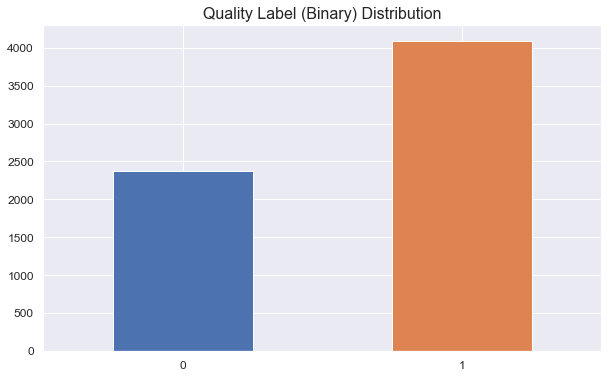

In [65]:
# explore the binary target variable: quality_label
ql_count = wine2.quality_label.value_counts().sort_index()
print(ql_count)
plt.figure(figsize=(10,6))
plt.title('Quality Label (Binary) Distribution',fontsize=16)
ql_hist = ql_count.plot(kind='bar');
ql_hist.set_xticklabels(ql_hist.get_xticklabels(),rotation=0)
plt.show() 

In [66]:
features2 = ['fixed_acidity',
             'volatile_acidity',
             'citric_acid',
             'residual_sugar',
             'chlorides',
             'total_sulfur_dioxide',
             'density',
             'ph',
             'sulphates',
             'alcohol']
target2 = ['quality_label']

In [171]:
X2 = wine2[features2]
y2 = wine2[target2]

In [172]:
# Split dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=200)

In [178]:
# Fit on train set
# wine_clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=200)
clf2 = DecisionTreeClassifier(random_state = 48,
                              max_depth = 7,
                              max_features = 8,
                              max_leaf_nodes = 100
                             )
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=8, max_leaf_nodes=100, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=48, splitter='best')

In [179]:
# Measure plain accuracy of the classifier
prediction2 = clf2.predict(X2_test)
accuracy_score(y_true=y2_test, y_pred=prediction2)

0.7463263727764888

In [193]:
# Cross Validation - Decision Tree Binary
time1 = time.time()
cv_clf = clf2
cv_X = X2
cv_y = y2
cv_folds = 10
# cv_scoring = None 
cv_scoring1 = 'roc_auc'
# cv_result = cross_val_score(cv_clf,cv_X,cv_y,cv=cv_folds,scoring=cv_scoring)
cv_result1 = cross_val_score(cv_clf,cv_X,cv_y,cv=cv_folds,scoring=cv_scoring1)

time2=time.time()
time_used=time2-time1
# print(cv_result)
print(cv_result1)
# print('Plain: Mean %.5f, Std %.5f' % (np.mean(cv_result),np.std(cv_result)))
print('  AUC: Mean %.5f, Std %.5f' % (np.mean(cv_result1),np.std(cv_result1)))
print("10cv time: %.5f" %time_used)

[0.71541299 0.73501675 0.72351521 0.72329341 0.77144007 0.8275252
 0.81616168 0.76707107 0.67770006 0.71099626]
  AUC: Mean 0.74681, Std 0.04541
10cv time: 0.20522


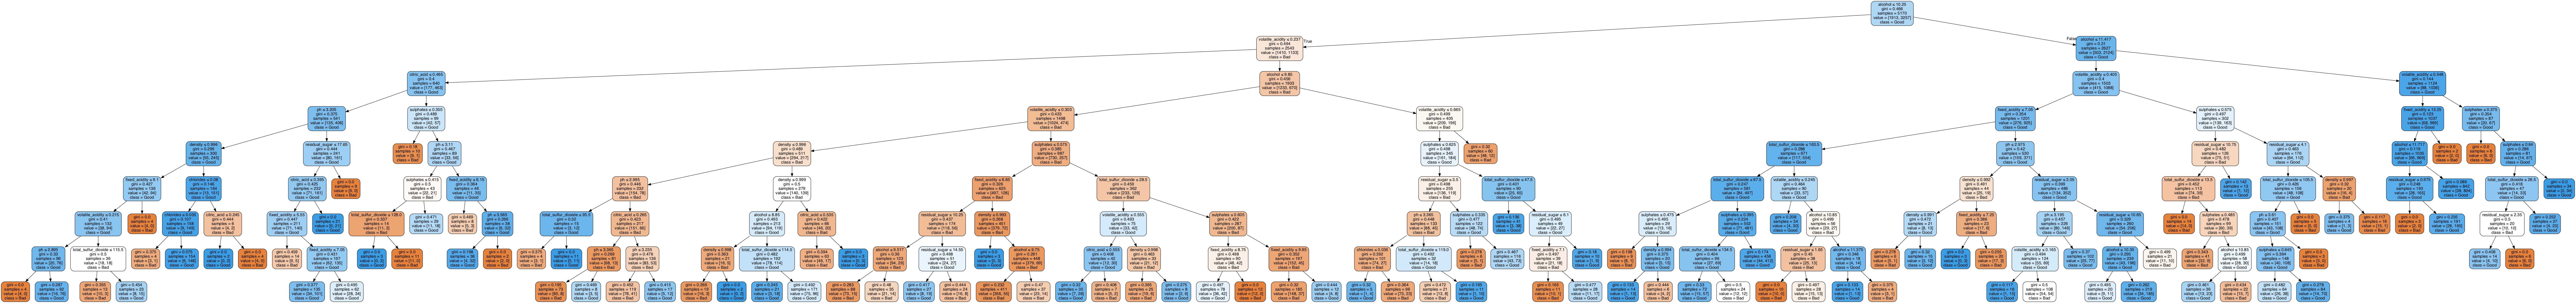

In [190]:
# Decision Tree Visualisation - Binary
feature_names2 = np.array(features2)
target_names2 = ['Bad','Good']

dot_data = tree.export_graphviz(clf2, out_file=None,
                         feature_names=feature_names2,
                         class_names=target_names2,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("wine_dt_2.png")
Image(graph.create_png()) 

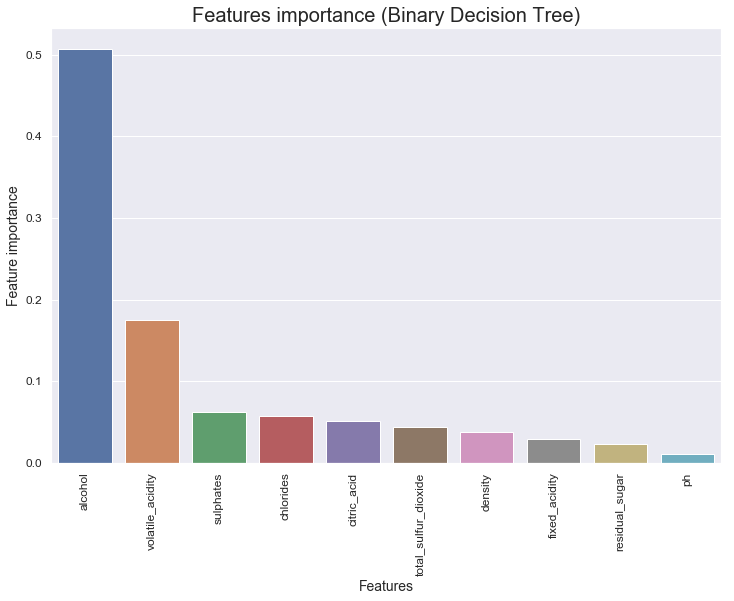

In [73]:
tmp = pd.DataFrame({'Features': features2, 'Feature importance': clf2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance (Binary Decision Tree)',fontsize=20)
s = sns.barplot(x='Features',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

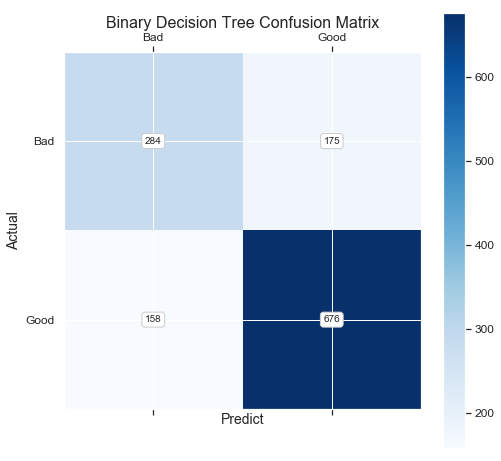

In [45]:
# Confusion Matrix - Binary Decision Tree
y2_pred = clf2.predict(X_test)
conf_mat = confusion_matrix(y2_test, clf2.predict(X_test))
# print('Confusion matrix:\n', conf_mat)

labels = ['Bad', 'Good']
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='.8'))
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.title('Binary Decision Tree Confusion Matrix',fontsize=16)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [46]:
# Precision & Recall rate - Decision Tree Binary
precision_dt = precision_score(y2_test, y2_pred)
recall_dt = recall_score(y2_test, y2_pred)
f1_dt = f1_score(y2_test, y2_pred)
print("precision rate: %f" %precision_dt)
print("recall rate: %f" %recall_dt)
print("f1 score: %f" %f1_dt)

precision rate: 0.794360
recall rate: 0.810552
f1 score: 0.802374


In [147]:
thresholds = np.linspace(0.,1.,100)
profits = np.zeros((100,1))
for i in  range(100):
    conf_mat = confusion_matrix(y2_test, clf2.predict_proba(X_test)[:,1]>thresholds[i])
    allNegatives = conf_mat[0,0]+conf_mat[1,0]
    truePositive = conf_mat[1,1]
    falsePositive = conf_mat[0,1]

    profits[i] = 12*truePositive+5.5*falsePositive+8.5*allNegatives

In [148]:
import pylab
from pylab import plot
pylab.plot(thresholds, profits)

In [217]:
# Plot the ROC Curve
probs = clf2.predict_proba(X2_test) # Predict class probabilities of the input samples 
preds = probs[:,1]
y2_score = clf2.fit(X2_train, y2_train).predict_proba(X2_test)
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y2_test, preds) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

print(roc_auc)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, lw=2, label='AUC = %0.3f' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary Decision Tree ROC Curve',fontsize=20)
plt.legend(loc="lower right")
plt.show()

0.7943945497197015


In [50]:
# Plot the precision recall curve
precisions, recalls, thresholds = precision_recall_curve(y2_test, preds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1.1])
    
plt.figure(figsize=(10,6))
plt.title('Decision Tree Precision Recall Curve',fontsize=20)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()

In [186]:
# Grid Search for Decision Tree Binary
start = time.time()
classifier = DecisionTreeClassifier(random_state = 42)
parameters = {
              'max_depth': range(6,9),
              'max_features': range(6,9),
              'max_leaf_nodes':[50,100,200],
             }
kfold = KFold(n_splits=10)

grid = GridSearchCV(classifier, parameters, scoring = 'roc_auc', cv=kfold)
grid = grid.fit(X2_train, y2_train)

clf = grid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, clf.get_params()[key]))

print('test score: %f'%clf.score(X2_test, y2_test))
print('time used: %f'%time_used)

# pd.DataFrame(grid.cv_results_).T

best score: 0.796998
best parameters:
max_depth: 7
max_features: 8
max_leaf_nodes: 100
test score: 0.739366
time used: 4.480335


In [185]:
# RandomizedSearchCV - Decision Tree Binary
start = time.time()
from sklearn.model_selection import RandomizedSearchCV

classifier = DecisionTreeClassifier(random_state = 42)
parameters = {
              'max_depth': range(6,9),
              'max_features': range(6,9),
              'max_leaf_nodes':[50,100,200],
             }

rgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = 'roc_auc',n_iter=300,n_jobs = -1)
rgrid.fit(X2_train, y2_train)

rclf = rgrid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%rgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, rclf.get_params()[key]))

print('test score: %f'%rclf.score(X2_test, y2_test))
print('time used: %f'%time_used)

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.796040
best parameters:
max_depth: 6
max_features: 7
max_leaf_nodes: 100
test score: 0.734725
time used: 2.063590


## 1.3 Three-class Classification

In [100]:
# Convert to a 3-class Classification Task
# select quality 5 & 6 & 7, remove the rest quality levels
wine3 = copy.deepcopy(wine_clean)

wine3 = wine3.drop(wine3[wine3.quality < 5].index)
wine3 = wine3.drop(wine3[wine3.quality > 7].index)

wine3.describe()
# now we have 6022 observations

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6022.000000       6022.000000  6022.000000     6022.000000   
mean        7.224253          0.336139     0.320126        5.494686   
std         1.299208          0.159590     0.144553        4.799605   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.330000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6022.000000          6022.000000           6022.000000  6022.000000   
mean      0.056314            30.689389            116.017768     0.994760   
std       0.034715            17.164299             56.334651     0.002996   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             78.000000     0.992400   
50%       0.047000            29.000000            119.000000     0.995000   
75%       0.066000            42.000000            156.000000     0.997000   
max       0.611000           131.000000            344.000000     1.038980   

                ph    sulphates      alcohol      quality  
count  6022.000000  6022.000000  6022.000000  6022.000000  
mean      3.217439     0.532801    10.466420     5.824975  
std       0.159463     0.147799     1.176133     0.707931  
min       2.720000     0.220000     8.000000     5.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.200000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     1.980000    14.900000     7.000000

5    2128
6    2820
7    1074
Name: quality, dtype: int64


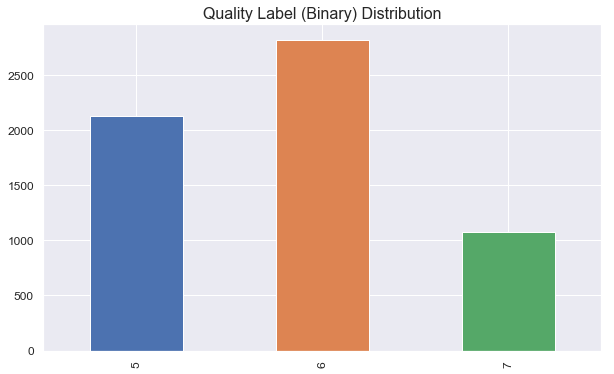

In [101]:
# explore the 3-class target variable: quality
ql3 = wine3.quality.value_counts().sort_index()
print(ql3)
plt.figure(figsize=(10,6))
plt.title('Quality Label (Binary) Distribution',fontsize=16)
ql3_hist = ql3.plot(kind='bar');
ql_hist.set_xticklabels(ql3_hist.get_xticklabels())
plt.show() 

In [102]:
features = ['fixed_acidity',
            'volatile_acidity',
            'citric_acid',
                'residual_sugar',
            'chlorides',
            'total_sulfur_dioxide',
            'density',
                'ph',
            'sulphates',
            'alcohol']
target = ['quality']

# form numberic column dataframe
X3 = wine3[features]
y3 = wine3[target]

In [103]:
# Split dataset into training set & test set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [140]:
# Fit on train set
# clf = DecisionTreeClassifier(max_features=5, max_depth=9, random_state=42) # Grid Search accuracy: 0.625
clf = DecisionTreeClassifier(random_state = 42,
                             max_depth=8, 
                             max_features=9, 
                             max_leaf_nodes=200,
                            ) # accuracy

clf.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=9, max_leaf_nodes=200, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [141]:
# Test the accuracy
prediction = clf.predict(X3_test)
print("Decision Tree Accuracy:",accuracy_score(y3_test, prediction))

Decision Tree Accuracy: 0.5842323651452282


In [188]:
# cross validation Score - Decision Tree 3 Class
cv_clf = clf
cv_X = X3
cv_y = y3
cv_folds = 10
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf,cv_X,cv_y,cv=cv_folds,scoring=cv_scoring)
print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))

[0.49585406 0.50414594 0.53233831 0.52902156 0.51993355 0.58139535
 0.56976744 0.55481728 0.50083195 0.55074875]
Mean: 0.53389, Std: 0.02813


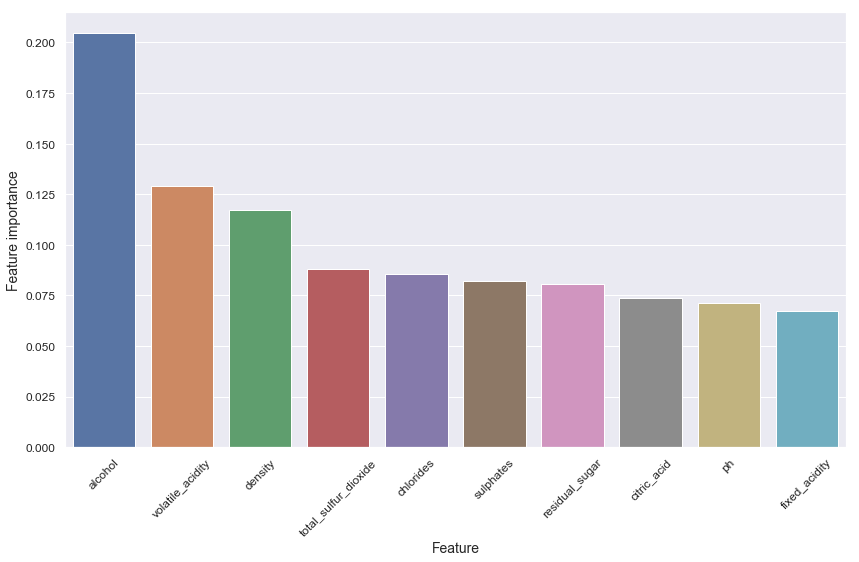

In [61]:
tmp = pd.DataFrame({'Feature': features10, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (14,8))
# plt.title('Features importance (Multi-class Decision Tree)',fontsize=20)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show() 

In [135]:
# RandomizedSearchCV

classifier = DecisionTreeClassifier(random_state = 42)
parameters = {
              'max_depth': range(3,10),
              'max_features': range(3,10),
              'max_leaf_nodes':[5,10,20,100,200],
             }

rgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = None,n_iter=300,n_jobs = -1)
rgrid.fit(X3_train, y3_train)

rclf = rgrid.best_estimator_

print('best score: %f'%rgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, rclf.get_params()[key]))

print('test score: %f'%rclf.score(X3_test, y3_test))

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.609093
best parameters:
max_depth: 8
max_features: 9
max_leaf_nodes: 200
test score: 0.591701


0    \
mean_fit_time                                                 0.0058588   
std_fit_time                                                0.000588888   
mean_score_time                                              0.00109687   
std_score_time                                              0.000101881   
param_max_leaf_nodes                                                  5   
param_max_features                                                    3   
param_max_depth                                                       3   
params                {'max_leaf_nodes': 5, 'max_features': 3, 'max_...   
split0_test_score                                               0.57971   
split1_test_score                                              0.585921   
split2_test_score                                              0.585062   
split3_test_score                                              0.551867   
split4_test_score                                              0.562241   
split5_test_score                                              0.570539   
split6_test_score                                              0.553942   
split7_test_score                                               0.56341   
split8_test_score                                              0.541667   
split9_test_score                                               0.58125   
mean_test_score                                                0.567573   
std_test_score                                                0.0146076   
rank_test_score                                                     182   
split0_train_score                                             0.566221   
split1_train_score                                             0.565528   
split2_train_score                                             0.565629   
split3_train_score                                             0.569319   
split4_train_score                                             0.568166   
split5_train_score                                             0.567243   
split6_train_score                                             0.569089   
split7_train_score                                             0.568035   
split8_train_score                                              0.57044   
split9_train_score                                             0.566059   
mean_train_score                                               0.567573   
std_train_score                                              0.00162249   

                                                                    1    \
mean_fit_time                                                0.00735521   
std_fit_time                                                 0.00224202   
mean_score_time                                              0.00132542   
std_score_time                                              0.000777034   
param_max_leaf_nodes                                                 10   
param_max_features                                                    3   
param_max_depth                                                       3   
params                {'max_leaf_nodes': 10, 'max_features': 3, 'max...   
split0_test_score                                              0.585921   
split1_test_score                                              0.567288   
split2_test_score                                              0.599585   
split3_test_score                                              0.556017   
split4_test_score                                              0.562241   
split5_test_score                                              0.582988   
split6_test_score                                              0.553942   
split7_test_score                                              0.561331   
split8_test_score                                               0.55625   
split9_test_score                                              0.577083   
mean_test_score                                                0.570272   
std_test_score   

Confusion matrix:
 [[248 188   6]
 [105 404  28]
 [ 19 155  52]]


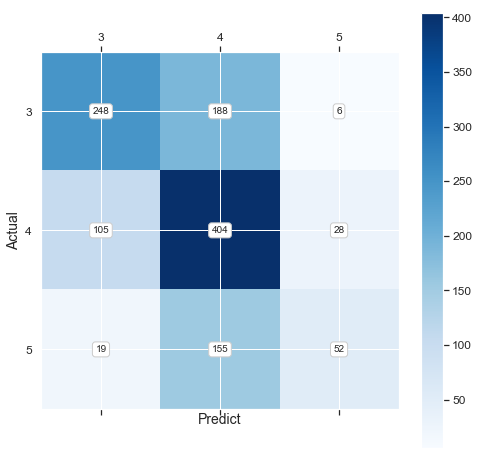

In [143]:
# print("Decision Tree Accuracy:",accuracy_score(y_test, clf.predict(X_test)))

conf_mat = confusion_matrix(y3_test, clf.predict(X3_test))
# plot_confusion_matrix(conf_mat, classes=class_names, title='Confusion matrix')
print('Confusion matrix:\n', conf_mat)

labels = [3,4,5,6,7,8,9]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='.8'))
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predict')
# plt.title('Multi-class Decision Tree',fontsize=16)
plt.ylabel('Actual')
plt.show()

# 2. Random Forest

## 2.1 Multi-class Random Forest

In [201]:
rf_clf = RandomForestClassifier(random_state=5,
                                n_estimators=250,
                                min_samples_split=2,
                                max_leaf_nodes=200,
                                max_depth =10
                               )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=200,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [202]:
print("Multi-class Random Forest Test Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

Multi-class Random Forest Test Accuracy: 0.6117556071152359


In [231]:
# cross validation Score - Multi-class Random Forest
time1=time.time()
cv_clf = rf_clf
cv_X_test = X_10
cv_y_test = y
cv_folds = 10
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf, cv_X_test, cv_y_test, cv=cv_folds,scoring=cv_scoring)
time2=time.time()
time_used=time2-time1
print('cross validation - Random Forest Multi-class')
print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))
print("10cv time: %.5f" %time_used)

cross validation - Random Forest Multi-class
[0.50539291 0.50077042 0.52469136 0.55709877 0.52941176 0.56589147
 0.5875969  0.55193798 0.44254658 0.54503106]
Mean: 0.53104, Std: 0.03895
10cv time: 17.90341


In [57]:
# Grid Search for RF Multi
start = time.time()
classifier = RandomForestClassifier(random_state = 5, max_depth = 10)
parameters = {
              'n_estimators': [50,150,250],
              'min_samples_split': [2,3,4],
              'max_leaf_nodes':[5,10,20,100,200],
             }
scoring_fnc = make_scorer(accuracy_score)
kfold = KFold(n_splits=10)

grid = GridSearchCV(classifier, parameters, scoring_fnc, cv=kfold)
grid = grid.fit(X_train, y_train)

clf = grid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, clf.get_params()[key]))

print('test score: %f'%clf.score(X_test, y_test))
print('time used:', time_used)

# pd.DataFrame(grid.cv_results_).T

best score: 0.618762
best parameters:
n_estimators: 250
min_samples_split: 2
max_leaf_nodes: 200
test score: 0.611756
time used: 269.3734540939331


In [59]:
# RandomizedSearchCV - Random Forest Multi
start = time.time()
classifier = RandomForestClassifier(random_state = 5, max_depth = 10)
parameters = {
              'n_estimators': [50,150,250],
              'min_samples_split': [2,3,4],
              'max_leaf_nodes':[5,10,20,100,200],
             }

rgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = None,n_iter=300,n_jobs = -1)
rgrid.fit(X_train, y_train)

rclf = rgrid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%rgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, rclf.get_params()[key]))

print('test score: %f'%rclf.score(X_test, y_test))
print('time used:', time_used)

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.619149
best parameters:
n_estimators: 250
min_samples_split: 3
max_leaf_nodes: 200
test score: 0.610209
time used: 120.39153790473938


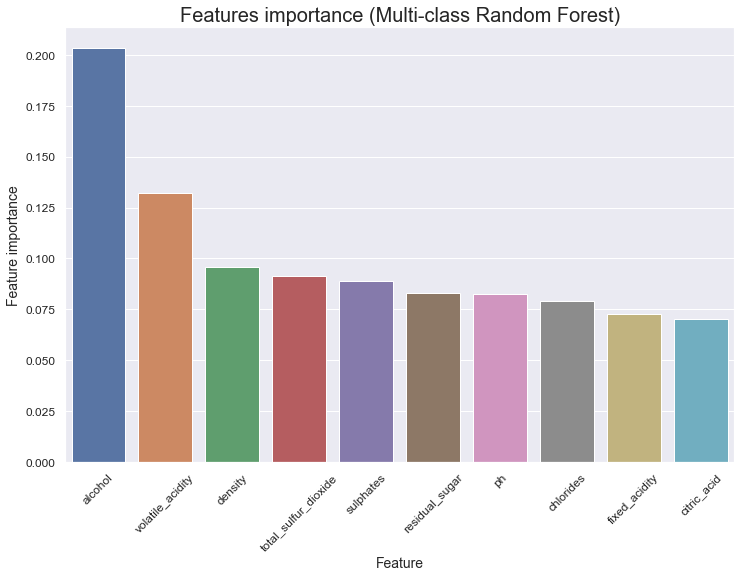

In [60]:
tmp = pd.DataFrame({'Feature': features10, 'Feature importance': rf_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance (Multi-class Random Forest)',fontsize=20)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

In [111]:
# plot the confusion matrix
# conf_mat = confusion_matrix(y_test, rf_clf.predict(X_test))
conf_mat = confusion_matrix(y, rf_clf.predict(X_10))
print('Confusion matrix:\n', conf_mat)

labels = [3,4,5,6,7,8,9]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='.8'))
fig.colorbar(cax) # color legend
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
# plt.title('Multi-class Random Forest',fontsize=16)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

Confusion matrix:
 [[  11    0    8   10    1    0    0]
 [   0   52   96   64    2    0    0]
 [   0    1 1775  345    7    0    0]
 [   0    0  299 2478   43    0    0]
 [   0    0   23  315  736    0    0]
 [   0    0    0   81   38   73    0]
 [   0    0    0    3    2    0    0]]


## 2.2 Binary Random Forest

In [85]:
rf_clf2 = RandomForestClassifier(random_state = 48)
rf_clf2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=48, verbose=0, warm_start=False)

In [86]:
print("Binary Random Forest Accuracy:", accuracy_score(y2_test, rf_clf2.predict(X2_test)))

Binary Random Forest Accuracy: 0.7849961330239753


In [205]:
# Cross Validation - Random Forest Binary
time1 = time.time()
cv_clf = rf_clf2
cv_X_test = X2_test
cv_y_test = y2_test
cv_folds = 8
# cv_scoring = None 
cv_scoring1 = 'roc_auc'
# cv_result = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring)
cv_result1 = cross_val_score(cv_clf,cv_X_test,cv_y_test,cv=cv_folds,scoring=cv_scoring1)

time2=time.time()
time_used=time2-time1
# print(cv_result)
print(cv_result1)
# print('Plain: Mean %.5f, Std %.5f' % (np.mean(cv_result),np.std(cv_result)))
print('  AUC: Mean %.5f, Std %.5f' % (np.mean(cv_result1),np.std(cv_result1)))
print("10cv time: %.5f" %time_used)

[0.79573071 0.84720854 0.81855106 0.80010121 0.82574224 0.84345479
 0.78247301 0.8162112 ]
  AUC: Mean 0.81618, Std 0.02126
10cv time: 0.21042


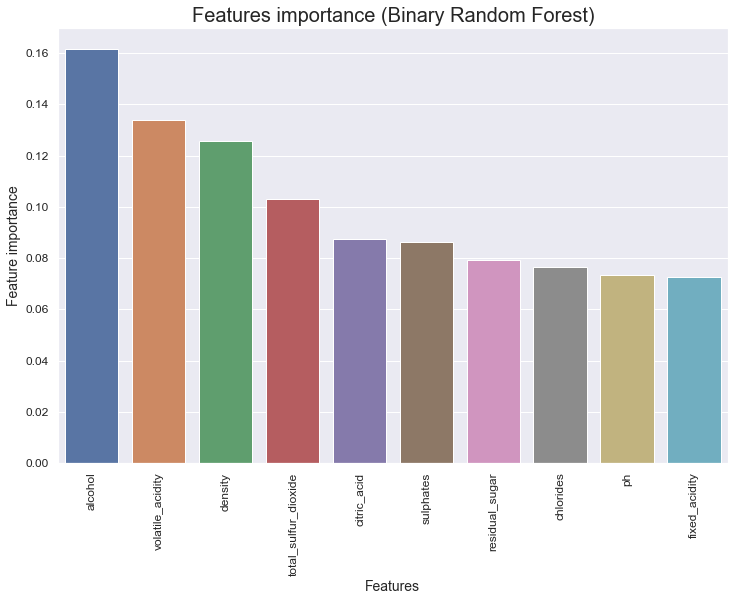

In [91]:
tmp = pd.DataFrame({'Features': features2, 'Feature importance': rf_clf2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance (Binary Random Forest)',fontsize=20)
s = sns.barplot(x='Features',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Confusion matrix:
 [[320 139]
 [139 695]]


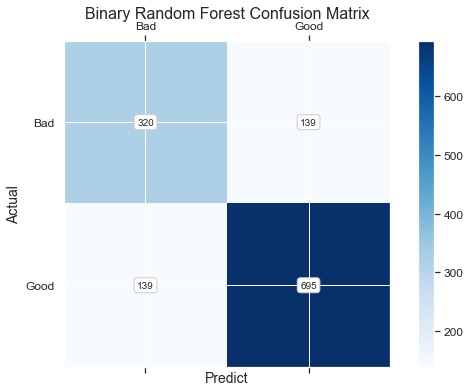

In [92]:
y2_pred_rf = rf_clf2.predict(X2_test)
conf_mat = confusion_matrix(y2_test, rf_clf2.predict(X2_test))
print('Confusion matrix:\n', conf_mat)

labels = ['Bad', 'Good']
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='.8'))
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.title('Binary Random Forest Confusion Matrix',fontsize=16)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [93]:
from sklearn.model_selection import cross_val_predict, cross_val_score
cv = 5
print('Score(AUC): %.5f +/- %.4f' % (np.mean(cross_val_score(rf_clf2,X2_test,y2_test,cv=cv,scoring='roc_auc')),np.std(cross_val_score(rf_clf2,X2_test,y2_test,cv=cv,scoring='roc_auc'))))

Score(AUC): 0.80907 +/- 0.0380


In [94]:
# Precision & Recall rate - Decision Tree Binary
precision_rf = precision_score(y2_test, y2_pred_rf)
recall_rf = recall_score(y2_test, y2_pred_rf)
f1_rf = f1_score(y2_test, y2_pred)
print("Precision Rate: %f" %precision_rf)
print("Recall Rate: %f" %recall_rf)
print("F1 Score: %f" %f1_rf)

Precision Rate: 0.833333
Recall Rate: 0.833333
F1 Score: 0.802374


In [214]:
# Plot the ROC Curve
rf2_probs = rf_clf2.predict_proba(X2_test) # Predict class probabilities of the input samples 
rf2_preds = rf2_probs[:,1]
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y2_test, rf2_preds) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, lw=2, label='AUC = %0.3f' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [227]:
# Plot the precision recall curve
precisions, recalls, thresholds = precision_recall_curve(y2_test, rf_preds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1.1])
    
plt.figure(figsize=(10,6))
plt.title('Random Forest Precision Recall Curve',fontsize=20)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()

In [227]:
thresholds = np.linspace(0.,1.,100)
profits = np.zeros((100,1))
for i in  range(100):
    conf_mat = confusion_matrix(y2_test, rf_clf2.predict_proba(X2_test)[:,1]>thresholds[i])
    allNegatives = conf_mat[0,0]+conf_mat[1,0]
    truePositive = conf_mat[1,1]
    falsePositive = conf_mat[0,1]

    profits[i] = 12*truePositive+5.5*falsePositive+8.5*allNegatives
    
import pylab
from pylab import plot
pylab.plot(thresholds, profits)

TypeError: 'numpy.float64' object does not support item assignment

In [228]:
12/12+5.5

6.5

In [109]:
# Grid Search for RF Binary
start = time.time()
classifier = RandomForestClassifier(random_state = 5, max_depth = 10)
parameters = {
              'n_estimators': [50,150,250],
              'min_samples_split': [2,3,4],
              'max_leaf_nodes':[200,250],
             }
kfold = KFold(n_splits=10)

grid = GridSearchCV(classifier, parameters, scoring = 'roc_auc', cv=kfold)
grid = grid.fit(X2_train, y2_train)

clf = grid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, clf.get_params()[key]))

print('test score: %f'%clf.score(X2_test, y2_test))
print('time used:', time_used)

# pd.DataFrame(grid.cv_results_).T

best score: 0.874306
best parameters:
n_estimators: 250
min_samples_split: 4
max_leaf_nodes: 250
test score: 0.791957
time used: 146.2422559261322


In [98]:
# RandomizedSearchCV - Random Forest Binary
start = time.time()
classifier = RandomForestClassifier(random_state = 5, max_depth = 10)
parameters = {
            'n_estimators': [50,150,250],
            'min_samples_split': [2,3,4],
            'max_leaf_nodes':[200,250]
}

rgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = 'roc_auc',n_iter=300,n_jobs = -1)
rgrid.fit(X2_train, y2_train)

rclf = rgrid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%rgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, rclf.get_params()[key]))

print('test score: %f'%rclf.score(X2_test, y2_test))
print('time used:', time_used)

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.873216
best parameters:
n_estimators: 250
min_samples_split: 4
max_leaf_nodes: 250
test score: 0.791957
time used: 62.94390392303467


## 2.3 Three-class Random Forest

In [104]:
rf3_clf = RandomForestClassifier(random_state=42)
rf3_clf.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
print("Multi-class Random Forest Test Accuracy:", accuracy_score(y3_test, rf_clf.predict(X3_test)))

Multi-class Random Forest Test Accuracy: 0.8240663900414937


In [107]:
# cross validation Score - Multi-class Random Forest
cv_clf = rf3_clf
cv_X_test = X3
cv_y_test = y3
cv_folds = 10
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf, cv_X_test, cv_y_test, cv=cv_folds,scoring=cv_scoring)
print('cross validation - Random Forest Multi-class')
print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))

cross validation - Random Forest Multi-class
[0.50414594 0.50580431 0.50580431 0.54726368 0.54817276 0.57973422
 0.60631229 0.53986711 0.49417637 0.54742097]
Mean: 0.53787, Std: 0.03439


In [115]:
# RandomizedSearchCV - Random Forest 3-Class
start = time.time()
classifier = RandomForestClassifier(random_state = 42, max_depth = 10)
parameters = {
              'n_estimators': [50,150,250],
                'min_samples_split': [2,3,4],
                'max_leaf_nodes':[200,250]
             }

rgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = None,n_iter=300,n_jobs = -1)
rgrid.fit(X3_train, y3_train)

rclf = rgrid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%rgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, rclf.get_params()[key]))

print('test score: %f'%rclf.score(X3_test, y3_test))
print('time used: %f'%time_used)

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.669919
best parameters:
n_estimators: 250
min_samples_split: 2
max_leaf_nodes: 250
test score: 0.662241
time used: 63.346566


# 3. SVM

## 3.1 Multi-class Task

In [116]:
# we use standadised data: X_std, y_std
y_std = copy.deepcopy(y)

# Split dataset into training set & test set
X3_train, X3_true, y3_train, y3_true = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

In [121]:
# create a pipline for SVM (Geron, 2017)
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
# from sklearn.datasets import make_moons 
# from sklearn.pipeline import Pipeline 
# from sklearn.preprocessing import PolynomialFeatures

# build model
svm_clf = svm.SVC(random_state=42)

# fit data
svm_clf.fit(X3_train,y3_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [122]:
y3_pred = svm_clf.predict(X3_true)
acc3 = accuracy_score(y3_true, y3_pred)
print("SVM Accuracy:", acc3)

SVM Accuracy: 0.5591647331786543


In [206]:
# cross validation Score - SVM
time1=time.time()
cv_clf = svm_clf
cv_X = X_std
cv_y = y_std
cv_folds = 5
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf,cv_X,cv_y,cv=cv_folds,scoring=cv_scoring)
time2=time.time()
time_used=time2-time1
print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))
print("10cv time: %.5f" %time_used)

[0.50463679 0.53786708 0.54215004 0.56965944 0.36434109]
Mean: 0.50373, Std: 0.07269
10cv time: 5.55975


In [124]:
# RandomizedSearchCV - SVM Multi
start = time.time()
classifier = svm.SVC(random_state = 42)
parameters = {
              'C': [1e-2, 1e-1, 1, 10, 50, 100, 1000], 
              'gamma': [0.01, 0.001],
              'degree': [1,2,3]
             }

sgrid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = None,n_iter=300,n_jobs = -1)
sgrid.fit(X3_train, y3_train)

sclf = sgrid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%sgrid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, sclf.get_params()[key]))

print('test score: %f'%sclf.score(X3_true, y3_true))
print("time used: ", time_used)

# pd.DataFrame(sgrid.cv_results_).T

best score: 0.572921
best parameters:
C: 1000
gamma: 0
degree: 1
test score: 0.552978
time used:  372.6797602176666


## 3.2 Binary Task

In [144]:
# form bianry y_std2
y_std2 = copy.deepcopy(y_std)
y_std2 = (y_std > 5.5)*1

# Split dataset into training set & test set
X3_train2, X3_true2, y3_train2, y3_true2 = train_test_split(X_std, y_std2, test_size=0.2, random_state=42)

# transform float type to int
y_std2=y_std2.astype('int')
y3_train2=y3_train2.astype('int')
y3_true2=y3_true2.astype('int')

In [234]:
# build model
# build model
svm_clf2 = svm.SVC(random_state=42,
                   C=0.1,
                  )

# fit data
svm_clf2.fit(X3_train2,y3_train2)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [235]:
y3_pred2 = svm_clf2.predict(X3_true2)
acc32 = accuracy_score(y3_true2, y3_pred2)
print("SVM Accuracy:", acc32)

SVM Accuracy: 0.757153905645785


In [207]:
# cross validation Score - SVM
time1=time.time()
cv_clf = svm_clf2
cv_X = X_std
cv_y = y_std2
cv_folds = 5
cv_scoring = None # default accuracy
cv_result = cross_val_score(cv_clf,cv_X,cv_y,cv=cv_folds,scoring=cv_scoring)
time2=time.time()
time_used=time2-time1
print(cv_result)
print('Mean: %.5f, Std: %.5f' % (np.mean(cv_result),np.std(cv_result)))
print("10cv time: %.5f" %time_used)

[0.71406491 0.73163186 0.73297214 0.75851393 0.42569659]
Mean: 0.67258, Std: 0.12425
10cv time: 3.97350


In [146]:
# RandomizedSearchCV - SVM Binary
start = time.time()
classifier = svm.SVC(random_state = 42)
parameters = {
              'C': [1e-2, 1e-1, 1, 10, 50, 100, 1000], 
              'gamma': [0.01, 0.001],
              'degree': [1,2,3]
             }

s2grid = RandomizedSearchCV(classifier,parameters,cv = 10,scoring = 'roc_auc',n_iter=300,n_jobs = -1)
s2grid.fit(X3_train2, y3_train2)

s2clf = s2grid.best_estimator_

end = time.time()
time_used = end - start

print('best score: %f'%s2grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s: %d'%(key, s2clf.get_params()[key]))

print('test score: %f'%s2clf.score(X3_true2, y3_true2))
print('time used:', time_used)

# pd.DataFrame(rgrid.cv_results_).T

best score: 0.819304
best parameters:
C: 1000
gamma: 0
degree: 1
test score: 0.759474
time used: 202.46147513389587
